In [3]:
import pandas as pd
import numpy as np
movies=pd.read_csv("C:/Users/DELL/OneDrive/Pictures/ml-latest-small/movies.csv")
movies
rating=pd.read_csv("C:/Users/DELL/OneDrive/Pictures/ml-latest-small/ratings.csv")
rating

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [4]:
rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
rating.value_counts()

In [ ]:
movies.head(5)

In [5]:
movie_rating=pd.merge(movies,rating,on='movieId')
movie_rating

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
100833,193585,Flint (2017),Drama,184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021


In [6]:
movie_rating.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [7]:
movie_rating['title'].value_counts()[:15]

title
Forrest Gump (1994)                                      329
Shawshank Redemption, The (1994)                         317
Pulp Fiction (1994)                                      307
Silence of the Lambs, The (1991)                         279
Matrix, The (1999)                                       278
Star Wars: Episode IV - A New Hope (1977)                251
Jurassic Park (1993)                                     238
Braveheart (1995)                                        237
Terminator 2: Judgment Day (1991)                        224
Schindler's List (1993)                                  220
Fight Club (1999)                                        218
Toy Story (1995)                                         215
Star Wars: Episode V - The Empire Strikes Back (1980)    211
American Beauty (1999)                                   204
Usual Suspects, The (1995)                               204
Name: count, dtype: int64

In [13]:
movie_rating.groupby('title')['rating'].agg(['mean', 'count']).sort_values(by='count', ascending=False)[:10]


,mean,count
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


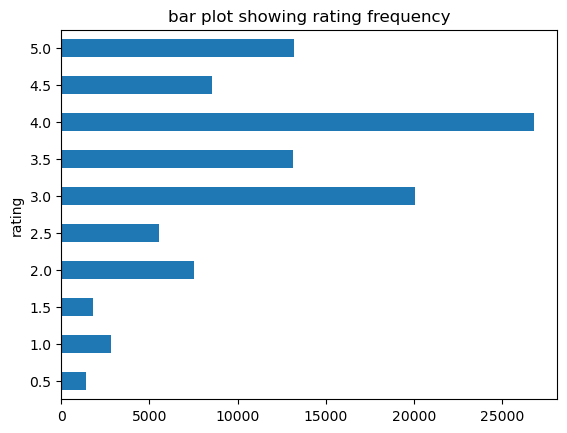

In [22]:
import matplotlib.pyplot as plt
movie_rating['rating'].value_counts().sort_index().plot(kind='barh')
plt.title('bar plot showing rating frequency')
plt.ylabel('rating')
plt.show()

# Data preprocessing

In [27]:
movie_rating.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [31]:
col_drop = ['title', 'genres', 'timestamp']
movie_rating_clean = movie_rating.drop(col_drop, axis=1, inplace=False)
movie_rating_clean.head()

,movieId,userId,rating
0,1,1,4.0
1,1,5,4.0
2,1,7,4.5
3,1,15,2.5
4,1,17,4.5


<!-- povit table -->


# Pivot table

In [34]:
movie_user_df=pd.pivot_table(movie_rating, values='rating', index='movieId', columns='userId',fill_value=0)
movie_user_df.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4,0.0,0.0,0,4,0,4.5,0,0,0.0,...,4.0,0,4,3,4.0,2.5,4,2.5,3,5.0
2,0,0.0,0.0,0,0,4,0.0,4,0,0.0,...,0.0,4,0,5,3.5,0.0,0,2.0,0,0.0
3,4,0.0,0.0,0,0,5,0.0,0,0,0.0,...,0.0,0,0,0,0.0,0.0,0,2.0,0,0.0
4,0,0.0,0.0,0,0,3,0.0,0,0,0.0,...,0.0,0,0,0,0.0,0.0,0,0.0,0,0.0
5,0,0.0,0.0,0,0,5,0.0,0,0,0.0,...,0.0,0,0,3,0.0,0.0,0,0.0,0,0.0


In [37]:
from sklearn.neighbors import NearestNeighbors
nn_algo=NearestNeighbors(metric='cosine')
nn_algo.fit(movie_user_df)

NearestNeighbors(metric='cosine')

# recommendation engine core

In [53]:
def recommend_movie(movie_name,nos=5):
    movieId = movies.loc[movies['title'] == movie_name]['movieId'].index[0]
    distance,neighbors= nn_algo.kneighbors([movie_user_df.loc[movieId]],n_neighbors=nos+1)
    movieids=[movie_user_df.iloc[i].name for i in neighbors[0]]
    movie_title_list=[]
    for ids in movieids:
        movie_title=movies.loc[movies.movieId==ids]['title'].item()
        movie_title_list.append(movie_title)
    print('\n'.join(movie_title_list))

In [58]:
recommend_movie('Titanic (1997)',5)

Indiana Jones and the Last Crusade (1989)
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)
Indiana Jones and the Temple of Doom (1984)
Star Wars: Episode V - The Empire Strikes Back (1980)
Star Wars: Episode VI - Return of the Jedi (1983)
Die Hard (1988)


# Getting the acutal movie

In [57]:
movies[movies['title'].str.lower().str.contains('titanic')]

,movieId,title,genres
1291,1721,Titanic (1997),Drama|Romance
2542,3403,Raise the Titanic (1980),Drama|Thriller
2543,3404,Titanic (1953),Action|Drama
3553,4864,Titanica (1992),Documentary|IMAX
